<a href="https://colab.research.google.com/github/CollinsKarani/karani/blob/master/password_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.2 MB/s eta 0:00:00


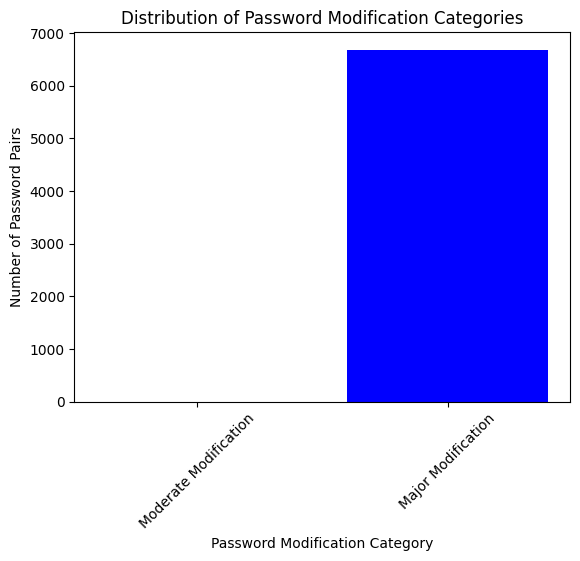

In [1]:
# Install necessary packages
!pip install python-Levenshtein strsimpy nltk matplotlib

import nltk
from Levenshtein import distance as levenshtein_distance
from strsimpy.jaro_winkler import JaroWinkler
import matplotlib.pyplot as plt
import numpy as np
import string

# Initialize the Jaro-Winkler object
jaro_winkler = JaroWinkler()

# Function to check if a password is valid based on ASCII characters and length
def is_valid_password(password):
    if 5 <= len(password) <= 17 and all(char in string.printable for char in password):
        return True
    return False

# Function to process the dataset
def preprocess_passwords(file_path):
    with open(file_path, 'r', encoding='latin-1') as f:
        passwords = [line.strip() for line in f]

    # Remove passwords that are too short, too long, or contain non-ASCII characters
    passwords = [password for password in passwords if is_valid_password(password)]

    # Remove duplicate passwords
    passwords = list(set(passwords))

    return passwords

# Function to create password pairs (only considering subsequent passwords for simplicity)
def create_password_pairs(passwords):
    password_pairs = []
    for i in range(0, len(passwords)-1, 2):  # Take subsequent pairs
        password_pairs.append((passwords[i], passwords[i+1]))
    return password_pairs

# Function to compute Levenshtein and Jaro-Winkler distances for each pair
def analyze_distances(password_pairs):
    labeled_data = []
    for pw1, pw2 in password_pairs:
        lev_dist = levenshtein_distance(pw1, pw2)
        jaro_winkler_dist = jaro_winkler.similarity(pw1, pw2)
        labeled_data.append({
            'password1': pw1,
            'password2': pw2,
            'levenshtein_distance': lev_dist,
            'jaro_winkler_distance': jaro_winkler_dist,
            'label': assign_label(lev_dist, jaro_winkler_dist)
        })
    return labeled_data

# Function to assign a label based on the Levenshtein and Jaro-Winkler distances
def assign_label(lev_dist, jaro_winkler_dist):
    # Custom rules for labeling based on distance values
    if lev_dist == 0:
        return 'Identical'
    elif lev_dist == 1:
        return 'Minor Modification'
    elif 2 <= lev_dist <= 5:
        return 'Moderate Modification'
    elif lev_dist > 5:
        return 'Major Modification'
    else:
        return 'Uncategorized'

# Function to visualize the password pairs count
def visualize_password_pairs(labeled_data):
    # Visualizing count of password pairs based on their labels
    labels = [entry['label'] for entry in labeled_data]
    label_counts = {label: labels.count(label) for label in set(labels)}

    fig, ax = plt.subplots()
    ax.bar(label_counts.keys(), label_counts.values(), color='blue')
    ax.set_xlabel('Password Modification Category')
    ax.set_ylabel('Number of Password Pairs')
    ax.set_title('Distribution of Password Modification Categories')
    plt.xticks(rotation=45)
    plt.show()

# Main function to process, analyze, and visualize the dataset
def main(file_path):
    # Step 1: Preprocess the dataset
    passwords = preprocess_passwords(file_path)

    # Step 2: Create password pairs
    password_pairs = create_password_pairs(passwords)

    # Step 3: Analyze distances and label the dataset
    labeled_data = analyze_distances(password_pairs)

    # Step 4: Visualize password pair counts
    visualize_password_pairs(labeled_data)

    return labeled_data

# Run the main function on your dataset
labeled_data = main('version_1.txt')
